   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
RMSE for Log transformation: 9196.064796874722
RMSE for Square transformation: 9672.422266258112
RMSE for Sqrt transformation: 6998.9387105646
RMSE for Cube transformation: 11873.848017180464


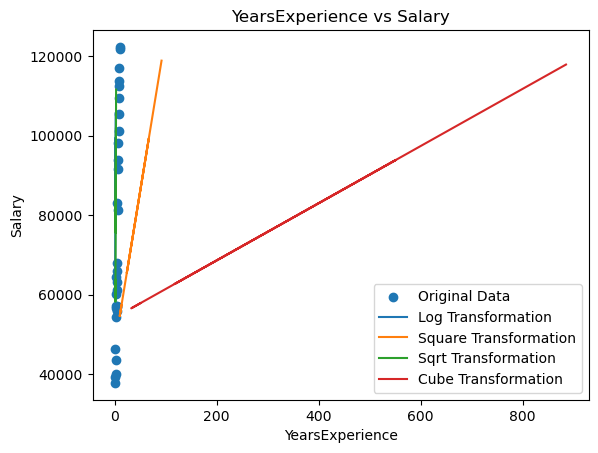

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

file_path = r"C:\Users\Owner\OneDrive\Desktop\data science assingment\assignments\simple linear regression\Salary_Data.csv  
data = pd.read_csv(file_path)
print(data.head())
print(data.describe())


plt.scatter(data['YearsExperience'], data['Salary'], label='Original Data')
plt.title('YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')


transformations = {
    'log': np.log,
    'square': np.square,
    'sqrt': np.sqrt,
    'cube': lambda x: np.power(x, 3)  
}


for transformation_name, transformation_func in transformations.items():
    X_transformed = transformation_func(data[['YearsExperience']])
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, data['Salary'], test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.plot(X_test, y_pred, label=f'{transformation_name.capitalize()} Transformation')

   
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print(f'RMSE for {transformation_name.capitalize()} transformation: {rmse}')

plt.legend()
plt.show()
